In [74]:
# Install all the necessary packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVC
import keras
from keras.datasets import fashion_mnist 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical 
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, ELU

In [38]:
# Load the data
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Data Exploration

In [39]:
print 'Training set shape : ', train_X.shape, train_Y.shape
print 'Test set shape : ', test_X.shape, test_Y.shape
names = np.unique(train_Y)
print 'Labels:', names

Training set shape :  (60000, 28, 28) (60000,)
Test set shape :  (10000, 28, 28) (10000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


In [40]:
# Dictionary that transforms digits into real labels
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover",
          3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt",
          7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

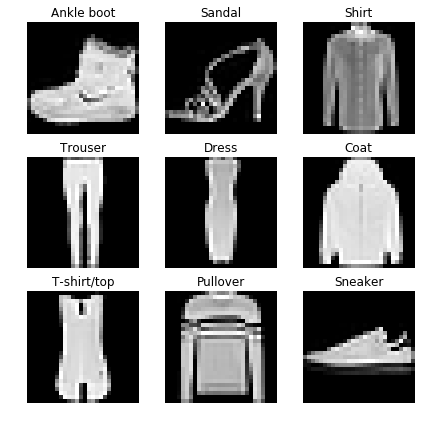

In [41]:
# Explore some of the examples (1 from each category)
plt.figure(figsize = [7,7])
index = [0,8000,3000,7900,59,457,4,5,6]
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.axis("off")
    plt.imshow(train_X[index[i-1],:,:], cmap='gray')
    plt.title(labels[train_Y[index[i-1]]])

## Data Pre-Processing

In [42]:
# Reshape the images to feed them to the CNN later
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
# Convert the data to float32 used by the network
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# Rescale the pixels values to 0-1
train_X = train_X / 255.
test_X = test_X / 255.

In [43]:
# CNNs don't work with categorical variables
# Therefore, we need dummies
train_Y_dummy = to_categorical(train_Y)
test_Y_dummy = to_categorical(test_Y)

In [44]:
# Split the training set to get a validation set
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y_dummy, test_size=0.2)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Model 1: Convolutional Neural Network

In [53]:
batch_size = 64
epochs = 30
classes = 10

In [50]:
# Create a model
model = Sequential()
# Convolutional layers apply a convolution operation to the input.
model.add(Conv2D(64,(3, 3),activation='linear',input_shape=(28,28,1)))
# Advanced activation layer
model.add(LeakyReLU(alpha=0.1))
# Pooling layers combine the outputs at one layer into a single neuron in the next layer.
model.add(MaxPooling2D((2, 2)))
# Drop some neurons to avoid overfitting
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(ELU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
# Converting all the results into a single linear vector.
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(ELU(alpha=0.1))           
model.add(Dropout(0.3))
# Classification lyer
model.add(Dense(classes, activation='softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
elu_6 (ELU)                  (None, 11, 11, 128)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 128)         0         
__________

In [52]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [54]:
train_model = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 363s 8ms/step - loss: 0.7482 - acc: 0.7187 - val_loss: 0.4816 - val_acc: 0.8261
Epoch 2/30
48000/48000 [==============================] - 504s 11ms/step - loss: 0.4961 - acc: 0.8180 - val_loss: 0.3967 - val_acc: 0.8588
Epoch 3/30
48000/48000 [==============================] - 458s 10ms/step - loss: 0.4312 - acc: 0.8434 - val_loss: 0.3618 - val_acc: 0.8685
Epoch 4/30
48000/48000 [==============================] - 407s 8ms/step - loss: 0.3938 - acc: 0.8571 - val_loss: 0.3299 - val_acc: 0.8810
Epoch 5/30
48000/48000 [==============================] - 364s 8ms/step - loss: 0.3735 - acc: 0.8627 - val_loss: 0.3228 - val_acc: 0.8852
Epoch 6/30
48000/48000 [==============================] - 358s 7ms/step - loss: 0.3493 - acc: 0.8708 - val_loss: 0.3094 - val_acc: 0.8868
Epoch 7/30
48000/48000 [==============================] - 340s 7ms/step - loss: 0.3351 - acc: 0.8769 - val_loss: 0.2998 

In [55]:
model.save("model.h5py")

In [56]:
evaluation = model.evaluate(test_X, test_Y_dummy, verbose=1)
print 'Test loss:', evaluation[0]
print'Test accuracy:', evaluation[1]

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.28907238229513166
Test accuracy: 0.8997


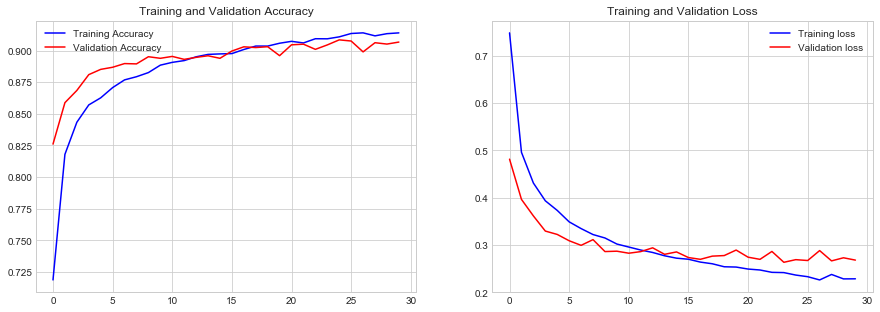

In [57]:
matplotlib.style.use('seaborn-whitegrid')
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', c = "r", label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', c = "r",label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [58]:
# Predict the labels of the test set
predict = np.argmax(np.round(model.predict(test_X)),axis=1)

Found 8904 correct labels.
Found 1096 incorrect labels.


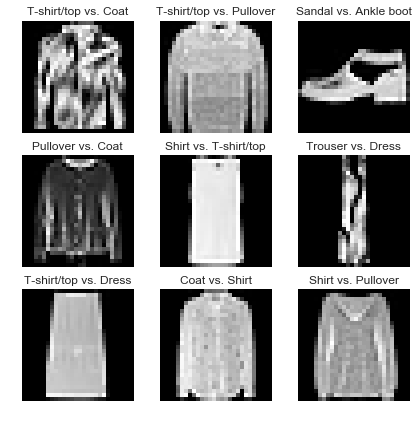

In [59]:
# Have a look at incorrectly identified items
correct = np.where(predict==test_Y)[0]
incorrect = np.where(predict!=test_Y)[0]
print "Found %d correct labels." % len(correct)
print "Found %d incorrect labels." % len(incorrect)
matplotlib.style.use("seaborn-dark")
plt.figure(figsize = [7,7])
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    #plt.title("Predicted {}, Class {}".format(predict[incorrect], test_Y[incorrect]))
    plt.title("{} vs. {}".format(labels[predict[incorrect]], labels[test_Y[incorrect]]))

In [61]:
target_names = ["Class: {}".format(labels[i]) for i in range(10)]
print(classification_report(test_Y, predict, target_names=target_names))

                    precision    recall  f1-score   support

Class: T-shirt/top       0.69      0.85      0.76      1000
    Class: Trouser       0.98      0.98      0.98      1000
   Class: Pullover       0.90      0.78      0.84      1000
      Class: Dress       0.92      0.89      0.91      1000
       Class: Coat       0.85      0.83      0.84      1000
     Class: Sandal       0.98      0.97      0.98      1000
      Class: Shirt       0.72      0.70      0.71      1000
    Class: Sneaker       0.96      0.96      0.96      1000
        Class: Bag       0.98      0.97      0.98      1000
 Class: Ankle boot       0.95      0.97      0.96      1000

       avg / total       0.90      0.89      0.89     10000



## Model 2: Random Forest

In [70]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100, bootstrap = True, max_depth = 80, max_features = 3, 
                             min_samples_leaf= 5, min_samples_split = 12)

In [65]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [66]:
# Data pre-processing (n_samples, n_features)
train_Y = train_Y.reshape(60000, -1)
train_X = train_X.reshape(60000, -1)
test_Y = test_Y.reshape(10000, -1)
test_X = test_X.reshape(10000, -1)

In [71]:
# Train Random Forest
rfc.fit(train_X, train_Y.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_pred = rfc.predict(test_X)

print("Accuracy: %f" % metrics.accuracy_score(test_Y, rf_pred)) # The fraction of correct predictions
print("Classification report for classifier %s:\n%s\n"
      % (rfc, metrics.classification_report(test_Y, rf_pred))) 
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_Y, rf_pred))

Accuracy: 0.879000
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.83      0.86      0.84      1000
          1       0.99      0.96      0.98      1000
          2       0.77      0.80      0.79      1000
          3       0.88      0.91      0.89      1000
          4       0.78      0.83      0.80      1000
          5       0.98      0.96      0.97      1000
          6       0.72      0.60      0.66      1000
          7       0.93      0.95      0.94      1000
          8       0.96      0.97      0.9

In [72]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=100, max_depth = 3)
rf_small.fit(train_X, train_Y.ravel())
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

## Model 3: SVM (benchmark model)

In [77]:
clf = LinearSVC(random_state=0)
# Building a linear SVC 
clf.fit(train_X, train_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [79]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
# Predict on the original images
pred = clf.predict(test_X)

# Print performance metrics
print("Accuracy: %f" % metrics.accuracy_score(test_Y, pred))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(test_Y, pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_Y, pred))

Accuracy: 0.760000
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.81      0.72      0.76      1000
          1       0.94      0.95      0.94      1000
          2       0.82      0.38      0.51      1000
          3       0.77      0.83      0.80      1000
          4       0.68      0.63      0.66      1000
          5       0.73      0.94      0.82      1000
          6       0.41      0.71      0.52      1000
          7       0.94      0.77      0.85      1000
          8       0.93      0.84      0.89      1000
          9       0.94      0.83      0.88      1000

avg / total       0.80      0.76      0.76     10000


Confusion matrix:
[[720   8   5  61   8   0 181   0  16   1]
 [  7 953   2  25   4   0   6 